## Import packages

In [99]:
import pandas as pd
import warnings
import matplotlib
warnings.filterwarnings('ignore')

from importlib import reload

import Helpers
reload(Helpers)

<module 'Helpers' from 'C:\\Users\\Matth\\git\\DataAnalysisWorkbooks\\warcraftLogs\\RestoDruidAnalyzer\\Helpers.py'>

## Configurations

In [25]:
# Path variables
path_to_data = 'C:\\Users\\Matth\\git\\DataAnalysisWorkbooks\\warcraftLogs\\data\\'

# Set the plot style
matplotlib.style.use('seaborn-notebook')

# Have pandas display all rows?
display_max_rows = True

In [91]:
# Filters
spriest = 'No'  # Yes'/'No'/'Either'
innervate = 'Either'  # Yes'/'No'/'Either'
rotating_on_tank = 'Either'  # Yes'/'No'/'Either'
bloodlust = 'Either'  # Yes'/'No'/'Either'
natures_grace = 'Either'  # 'Yes'/'No'/'Either'
power_infusion = 'Either'  # 'Yes'/'No'/'Either'
nHealers = 'Any' # 4/5/6/'Any'

In [92]:
boss = "Supremus"

## Main analysis code

In [93]:
# Read in the dataset
data = pd.read_excel(path_to_data + "top_N_druids.xlsx", sheet_name=boss.replace(" ", ""))

if display_max_rows:
    pd.set_option('display.max_rows', None)

In [94]:
# Apply filters to data
data, n_filters, filters = Helpers.apply_filters(data, rotating_on_tank, spriest, innervate, bloodlust, natures_grace, power_infusion, nHealers)

In [95]:
data.columns

Index(['Rank', 'Name', 'Server', 'Date', 'Duration', 'nHealers', 'Spriest?',
       'Innervate?', 'Bloodlust?', 'Power Infusion?', 'Nature's Grace?',
       'LB_uptime', 'HPS', '% LB (tick) HPS', '% LB (bloom) HPS',
       '% Rejuv HPS', '% Regrowth HPS', '% Swiftmend HPS', 'Rotating on tank?',
       'Rotation 1', '% Rotation 1', 'Rotation 2', '% Rotation 2'],
      dtype='object')

In [96]:
data.head()

,Rank,Name,Server,Date,Duration,nHealers,Spriest?,Innervate?,Bloodlust?,Power Infusion?,...,% LB (tick) HPS,% LB (bloom) HPS,% Rejuv HPS,% Regrowth HPS,% Swiftmend HPS,Rotating on tank?,Rotation 1,% Rotation 1,Rotation 2,% Rotation 2
0,1,Kudryavka,Razorgore,Mar 31,2:51,5,No,No,No,No,...,0.62,0.09,0.13,0.06,0.08,Yes,2LB 3I 0RG,0.320,2LB 2I 0RG,0.200
1,3,喵绿喵绿喵,范沃森,Mar 31,2:14,5,No,Yes,No,No,...,0.11,0.01,0.04,0.70,0.10,Yes,0LB 2I 3RG,0.222,1LB 0I 2RG,0.167
2,4,氢硫化钠,奥罗,Mar 21,2:37,5,No,Yes,No,No,...,0.17,0.02,0.00,0.69,0.08,Yes,1LB 0I 3RG,0.312,1LB 0I 2RG,0.188
3,5,尔丶晴,辛迪加,Mar 12,2:03,5,No,Yes,No,No,...,0.24,0.07,0.06,0.49,0.10,Yes,1LB 1I 1RG,0.143,1LB 1I 3RG,0.143
4,6,皮哥,奎尔塞拉,Mar 22,2:56,5,No,Yes,Yes,No,...,0.34,0.03,0.07,0.50,0.06,Yes,1LB 1I 2RG,0.208,1LB 0I 2RG,0.167


array([[<AxesSubplot:title={'center':'HPS'}>]], dtype=object)

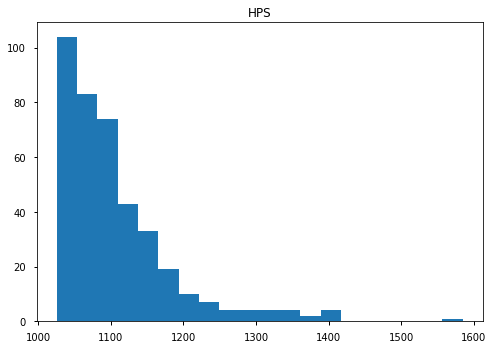

In [97]:
# Distribution of HPS
data.hist(column='HPS', bins=20, grid=False)

# A straightforward way to compare the rotations is with an errorplot, ie plot the mean HPS of each rotation where the x-error is just the standard error for each distribution:
# δ = σ / sqrt(N)

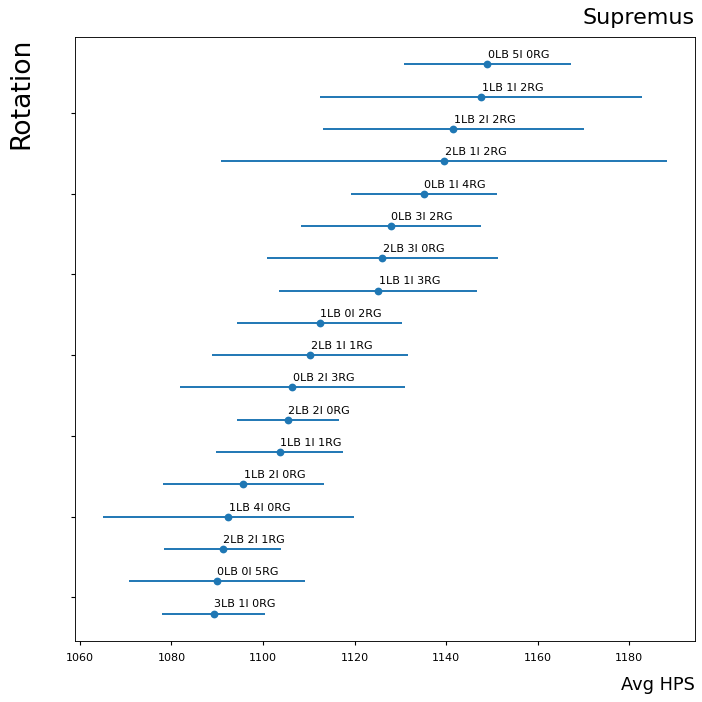

In [100]:
Helpers.plot_rotations(boss, data, n_filters, filters, save=True)

# However, one must be careful when using the mean because it can be sensitive to outliers in the data, especially when N is small. A common way to visualize data with outliers is a box-and-whisker plot.

In [11]:
# TODO: Add boxplot

# What variables correlate the strongest with HPS?

In [12]:
# Convert "Yes/No" to "1/0" for pandas
data['Spriest?'] = data['Spriest?'].map({'Yes': 1, 'No': 0})
data['Innervate?'] = data['Innervate?'].map({'Yes': 1, 'No': 0})
data['Bloodlust?'] = data['Bloodlust?'].map({'Yes': 1, 'No': 0})
data['Power Infusion?'] = data['Power Infusion?'].map({'Yes': 1, 'No': 0})
data["Nature's Grace?"] = data["Nature's Grace?"].map({'Yes': 1, 'No': 0})

In [13]:
data.corr()['HPS'].sort_values(ascending=False)

HPS                 1.000000
Power Infusion?     0.157373
Spriest?            0.125783
Nature's Grace?     0.113676
% Regrowth HPS      0.111619
% Rotation 1        0.069071
Bloodlust?          0.035577
% Rotation 2        0.029492
Innervate?         -0.013904
% Swiftmend HPS    -0.019322
% LB (bloom) HPS   -0.023366
% LB (tick) HPS    -0.036236
% Rejuv HPS        -0.110120
nHealers           -0.123243
Rank               -0.854705
Name: HPS, dtype: float64